## RAG Evaluation using Ragas

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [2]:
from rag_evaluation import RagEvaluation

/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.1.0 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


### Ragas Evaluation for Robinson Evaluation dataset

In [20]:
context_path = "../data/Evaluation Sets/Robinson Advisory.docx"
question_ans_path  = "../data/Evaluation Sets/Robinson Q&A.docx"

robinson_rag_eval = RagEvaluation(
    context_path=context_path, 
    question_ans_path=question_ans_path
)

2024-02-24 08:24:31,844:logger:ChromaDB vectorstore created successfully.
2024-02-24 08:24:31,846:logger:vectorstore_backend_retriver created successfully.
2024-02-24 08:24:31,869:logger:langchain with rag pipeline created successfully.
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/langchain_community/embeddings/openai.py:500: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  response = response.dict()
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/pydantic/main.py:979: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  warnings.warn('The `dict` method is deprecated; use `model_dump` instead.', DeprecationWarning)
2024-02-24 08:

In [4]:
robinson_ragas_dataset = robinson_rag_eval.create_ragas_dataset()

/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/langchain_community/embeddings/openai.py:500: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  response = response.dict()
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/pydantic/main.py:979: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  warnings.warn('The `dict` method is deprecated; use `model_dump` instead.', DeprecationWarning)
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/langchain_community/embeddings/openai.py:500: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Py

In [5]:
robinson_rag_eval_metrics_dict = robinson_rag_eval.evaluate_dataset(robinson_ragas_dataset)

Evaluating:   0%|          | 0/70 [00:00<?, ?it/s]/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/langchain_openai/chat_models/base.py:468: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  response = response.dict()
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/pydantic/main.py:979: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  warnings.warn('The `dict` method is deprecated; use `model_dump` instead.', DeprecationWarning)
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/langchain_openai/chat_models/base.py:468: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in P

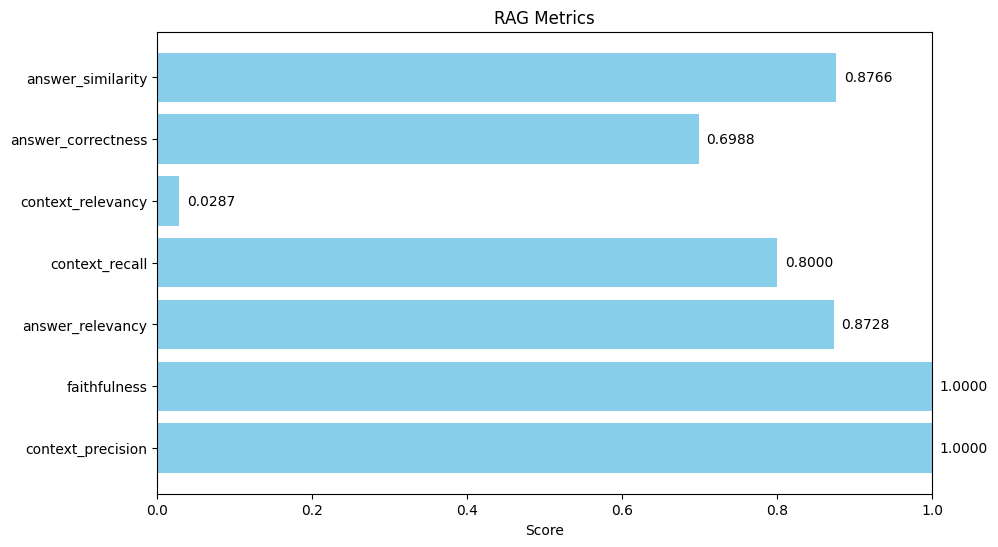

In [8]:
robinson_rag_eval.plot_evaluation(robinson_rag_eval_metrics_dict)

In [11]:
robinson_eval_df = robinson_rag_eval_metrics_dict.to_pandas()

In [12]:
robinson_eval_df

,question,answer,contexts,ground_truth,context_precision,faithfulness,answer_relevancy,context_recall,context_relevancy,answer_correctness,answer_similarity
0,Who are the parties to the Agreement and what ...,The entities involved in the Agreement are Clo...,"[Advisor shall not be deemed to be, nor treate...",Cloud Investments Ltd. (“Company”) and Jack Ro...,1.0,1.0,0.863507,1.0,0.087719,0.607370,0.929480
1,What is the termination notice?,The required notice period for terminating the...,"[Advisor shall not be deemed to be, nor treate...",According to section 4:14 days for convenience...,1.0,NaN,0.836819,1.0,0.044776,0.215980,0.863921
2,What are the payments to the Advisor under the...,"The payment terms for the Advisor, Mr. Jack Ro...",[NOW THEREFORE THE PARTIES AGREE AS FOLLOWS:\n...,According to section 6: 1. Fees of $9 per hour...,1.0,1.0,0.946909,1.0,0.044776,0.717164,0.868731
3,Can the Agreement or any of its obligations be...,"The Advisor is not permitted to assign, sell, ...","[Advisor shall not be deemed to be, nor treate...",1. Under section 1.1 the Advisor can’t assign ...,1.0,1.0,0.806620,1.0,0.029851,0.660250,0.926712
4,Who owns the IP?,Under the Agreement between Cloud Investments ...,[Cloud Investments Ltd. Advisor \n\nBy: ______...,According to section 4 of the Undertaking (App...,1.0,1.0,0.840374,1.0,0.020408,0.712572,0.850288
5,Is there a non-compete obligation to the Advisor?,"Yes, the Agreement with Cloud Investments Ltd....",[NOW THEREFORE THE PARTIES AGREE AS FOLLOWS:\n...,Yes. During the term of engagement with the Co...,1.0,1.0,0.808687,1.0,0.014925,0.701589,0.806356
6,Can the Advisor charge for meal time?,"No, the Advisor is not entitled to bill for me...",[NOW THEREFORE THE PARTIES AGREE AS FOLLOWS:\n...,"No. See Section 6.1, Billable Hour doesn’t inc...",1.0,NaN,0.973763,0.0,0.000000,0.824698,0.898790
7,In which street does the Advisor live?,The street address of the Advisor's residence ...,[ADVISORY SERVICES AGREEMENT\n\nThis Advisory ...,"1 Rabin st, Tel Aviv, Israel",1.0,1.0,0.947241,1.0,0.014925,0.975802,0.903208
8,Is the Advisor entitled to social benefits?,"No, Mr. Jack Robinson is not entitled to socia...","[Advisor shall not be deemed to be, nor treate...","No. According to section 8 of the Agreement, t...",1.0,1.0,0.860033,0.0,0.014925,0.854298,0.845705
9,What happens if the Advisor claims compensatio...,If it is determined by any governmental author...,"[Advisor shall not be deemed to be, nor treate...",If the Advisor is determined to be an employee...,1.0,1.0,0.844522,1.0,0.014925,0.718179,0.872716


In [13]:
robinson_eval_df[["question", "answer", "ground_truth"]]


,question,answer,ground_truth
0,Who are the parties to the Agreement and what ...,The entities involved in the Agreement are Clo...,Cloud Investments Ltd. (“Company”) and Jack Ro...
1,What is the termination notice?,The required notice period for terminating the...,According to section 4:14 days for convenience...
2,What are the payments to the Advisor under the...,"The payment terms for the Advisor, Mr. Jack Ro...",According to section 6: 1. Fees of $9 per hour...
3,Can the Agreement or any of its obligations be...,"The Advisor is not permitted to assign, sell, ...",1. Under section 1.1 the Advisor can’t assign ...
4,Who owns the IP?,Under the Agreement between Cloud Investments ...,According to section 4 of the Undertaking (App...
5,Is there a non-compete obligation to the Advisor?,"Yes, the Agreement with Cloud Investments Ltd....",Yes. During the term of engagement with the Co...
6,Can the Advisor charge for meal time?,"No, the Advisor is not entitled to bill for me...","No. See Section 6.1, Billable Hour doesn’t inc..."
7,In which street does the Advisor live?,The street address of the Advisor's residence ...,"1 Rabin st, Tel Aviv, Israel"
8,Is the Advisor entitled to social benefits?,"No, Mr. Jack Robinson is not entitled to socia...","No. According to section 8 of the Agreement, t..."
9,What happens if the Advisor claims compensatio...,If it is determined by any governmental author...,If the Advisor is determined to be an employee...


### Ragas Evaluation for Raptor Evaluation dataset

In [14]:
context_path = "../data/Evaluation Sets/Raptor Contract.docx"
question_ans_path  = "../data/Evaluation Sets/Raptor Q&A2.docx"

raptor_rag_eval = RagEvaluation(
    context_path=context_path, 
    question_ans_path=question_ans_path
)

2024-02-23 21:18:24,768:logger:ChromaDB vectorstore created successfully.
2024-02-23 21:18:24,770:logger:vectorstore_backend_retriver created successfully.
2024-02-23 21:18:24,793:logger:langchain with rag pipeline created successfully.
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/langchain_openai/embeddings/base.py:329: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  response = response.dict()
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/pydantic/main.py:979: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  warnings.warn('The `dict` method is deprecated; use `model_dump` instead.', DeprecationWarning)
2024-02-23 21:18:44

In [15]:
raptor_ragas_dataset = raptor_rag_eval.create_ragas_dataset()

/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/langchain_openai/embeddings/base.py:329: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  response = response.dict()
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/pydantic/main.py:979: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  warnings.warn('The `dict` method is deprecated; use `model_dump` instead.', DeprecationWarning)
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/langchain_openai/embeddings/base.py:329: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 

In [16]:
from datasets import Dataset

raptor_rag_eval_metrics_dict_1 = raptor_rag_eval.evaluate_dataset(Dataset.from_dict(raptor_ragas_dataset[:7]) )

Evaluating:   0%|          | 0/49 [00:00<?, ?it/s]/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/langchain_openai/chat_models/base.py:468: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  response = response.dict()
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/pydantic/main.py:979: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  warnings.warn('The `dict` method is deprecated; use `model_dump` instead.', DeprecationWarning)
/home/babi/miniconda3/envs/week10/lib/python3.8/site-packages/langchain_openai/chat_models/base.py:468: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in P

In [19]:
# raptor_rag_eval_metrics_dict_2 = raptor_rag_eval.evaluate_dataset(Dataset.from_dict(raptor_ragas_dataset[7:]) )

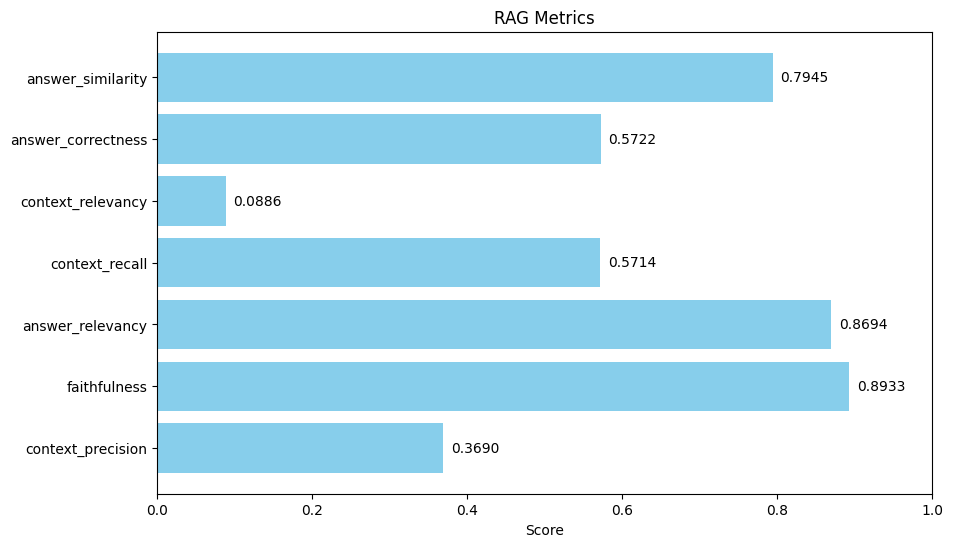

In [20]:
raptor_rag_eval.plot_evaluation(raptor_rag_eval_metrics_dict_1)

In [22]:
raptor_eval_df = raptor_rag_eval_metrics_dict_1.to_pandas()

In [23]:
raptor_eval_df

,question,answer,contexts,ground_truth,context_precision,faithfulness,answer_relevancy,context_recall,context_relevancy,answer_correctness,answer_similarity
0,Under what circumstances and to what extent th...,The Sellers' responsibility for a breach of re...,[SURVIVAL; RECOURSE LIMITATIONS\nSurvival\n. T...,"Except in the case of fraud, the Sellers have ...",1.000000,1.000000,0.787930,1.0,0.021505,0.887948,0.885127
1,Would the Sellers be responsible if after the ...,"Based on the provided context, Sellers would n...",[SURVIVAL; RECOURSE LIMITATIONS\nSurvival\n. T...,a,0.000000,1.000000,0.792070,1.0,0.005263,0.862673,0.723418
2,How much is the escrow amount?,The specific amount set aside in escrow for th...,[Estimated Purchase Price. The Purchase Price ...,"The escrow amount is equal to $1,000,000.",0.583333,NaN,0.893552,1.0,0.275362,0.210631,0.842525
3,Is escrow amount grete then the Retention Amou...,The provided text does not specify the exact v...,[Estimated Purchase Price. The Purchase Price ...,No.,0.000000,NaN,0.896425,0.0,0.079137,0.181493,0.726090
4,What is the purpose of the escrow?,The escrow amount in the agreement serves to p...,"[If any party has breached or violated, or if ...",To serve as a recourse of the Buyer in case of...,1.000000,0.800000,0.966011,1.0,0.015789,0.882560,0.863574
5,May the Escrow Amount serve as a recourse for ...,"Yes, the Buyer can use the Escrow Amount as re...","[If any party has breached or violated, or if ...",No,0.000000,0.666667,0.808541,0.0,0.042105,0.180683,0.722732
6,Are there any conditions to the closing?,The conditions that must be met for the closin...,"[If any party has breached or violated, or if ...","No, as the signing and closing are simultaneous.",0.000000,1.000000,0.941278,0.0,0.181159,0.799500,0.797999


In [26]:
# raptor_eval_df[["question", "answer", "ground_truth"]]
raptor_eval_df[["question", "answer", "ground_truth"]].to_dict()

{'question': {0: 'Under what circumstances and to what extent the Sellers are responsible for a breach of representations and warranties?',
  1: 'Would the Sellers be responsible if after the closing it is determined that there were inaccuracies in the representation provided by them where such inaccuracies are the resolute of the Sellers’ gross negligence?',
  2: 'How much is the escrow amount?',
  3: 'Is escrow amount grete then the Retention Amount ?',
  4: 'What is the purpose of the escrow?',
  5: 'May the Escrow Amount serve as a recourse for the Buyer in case of breach of representations by the Company?',
  6: 'Are there any conditions to the closing?'},
 'answer': {0: "The Sellers' responsibility for a breach of representations and warranties is subject to certain limitations as outlined in the provided context:\n\n1. **Survival of Representations and Warranties**: The representations and warranties of the parties terminate automatically at the Closing. However, covenants and a